# Problem Set 1: "Building a Strategic Portfolio"

In [38]:
# import packages
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pylab as plt
import scipy.stats
import statsmodels.api as sm
from datetime import date

In [ ]:
# get data from yfiance

#ydata = yfinance.download(['AAPL', 'GOOG', 'TSLA', 'IBE.MC', 'V', '^GSPC'], interval='1mo', start='2015-05-01')['Close'].dropna().to_csv('data.csv')

[*********************100%***********************]  6 of 6 completed


In [186]:
# load data from csv file

data = pd.read_csv('data.csv', index_col=['Date'], date_format=['Date'])

data.head()

,AAPL,GOOG,IBE.MC,TSLA,V,^GSPC
Date,,,,,,
2015-05-01,29.057026,26.480078,4.203310,16.719999,63.940159,2107.389893
2015-06-01,28.092155,25.902813,4.033736,17.884001,62.625172,2063.110107
2015-07-01,27.167181,31.133039,4.288764,17.743334,70.263298,2103.840088
2015-08-01,25.254498,30.766775,4.062201,16.604000,66.495552,1972.180054
2015-09-01,24.815363,30.277592,3.989747,16.559999,65.072495,1920.030029


In [187]:
# get log-return

ticker = ['AAPL', 'GOOG', 'TSLA', 'IBE.MC', 'V']
ticker_log = ['logreturn_AAPL', 'logreturn_GOOG', 'logreturn_TSLA', 'logreturn_IBE.MC', 'logreturn_V']

for i in range(len(ticker)):
    data.loc[:, "logreturn_" + ticker[i]] = np.log(data[ticker[i]]) - np.log(data[ticker[i]].shift())

In [188]:
# drop nan

data = data.dropna()

data.head()

,AAPL,GOOG,IBE.MC,TSLA,V,^GSPC,logreturn_AAPL,logreturn_GOOG,logreturn_TSLA,logreturn_IBE.MC,logreturn_V
Date,,,,,,,,,,,
2015-06-01,28.092155,25.902813,4.033736,17.884001,62.625172,2063.110107,-0.033770,-0.022041,0.067301,-0.041179,-0.020780
2015-07-01,27.167181,31.133039,4.288764,17.743334,70.263298,2103.840088,-0.033481,0.183918,-0.007897,0.061306,0.115082
2015-08-01,25.254498,30.766775,4.062201,16.604000,66.495552,1972.180054,-0.073005,-0.011834,-0.066366,-0.054274,-0.055115
2015-09-01,24.815363,30.277592,3.989747,16.559999,65.072495,1920.030029,-0.017541,-0.016027,-0.002654,-0.017997,-0.021633
2015-10-01,26.885183,35.372959,4.358733,13.795333,72.470901,2079.360107,0.080112,0.155540,-0.182660,0.088454,0.107683


# Jarque-Bera test for normality

In [189]:
# JB test statistic

JB = np.zeros((len(ticker)))

for i in range(len(ticker)):
    S = scipy.stats.skew(data["logreturn_" + ticker[i]])
    K = scipy.stats.kurtosis(data["logreturn_" + ticker[i]], fisher=False)
    N = data.shape[0]
    JB[i] = (N / 6) * (S**2 + 0.25 * (K - 3)**2)


JB

array([1.77864686, 2.36576581, 2.76692817, 6.54916188, 0.77898289])

In [190]:
# Chi-squared distribution

cdf = np.zeros((len(ticker)))

for i in range(len(ticker)):
    cdf[i] = scipy.stats.chi2.cdf(JB[i], 2)

cdf

array([0.58906632, 0.69360584, 0.74929143, 0.96216728, 0.32259872])

In [191]:
# p-value 

a = 0.05 #alpha

p = np.zeros((len(ticker)))

for i in range(len(ticker)):
    p[i] = 1 - cdf[i]
    if p[i] >= a:
        print(ticker[i] + ": probably normal distributed")
    else: 
        print(ticker[i] + ": not normal distributen")


p

AAPL: probably normal distributed
GOOG: probably normal distributed
TSLA: probably normal distributed
IBE.MC: not normal distributen
V: probably normal distributed


array([0.41093368, 0.30639416, 0.25070857, 0.03783272, 0.67740128])

# Build the IOS

In [192]:
mu = np.zeros((len(ticker)))

for i in range(len(ticker)):
    mu[i] = np.mean(data["logreturn_" + ticker[i]])*12 # annualized return

Sigma = (np.cov(data[ticker_log].T)*12).round(4) # annulized covariance matrix

print(mu)

[0.19051229 0.18569911 0.3010397  0.13500644 0.1710049 ]


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l7/q149vsq90bb6jd1b96qw2qyc0000gn/T/ipykernel_27671/1735519343.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(r)$')
/var/folders/l7/q149vsq90bb6jd1b96qw2qyc0000gn/T/ipykernel_27671/1735519343.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


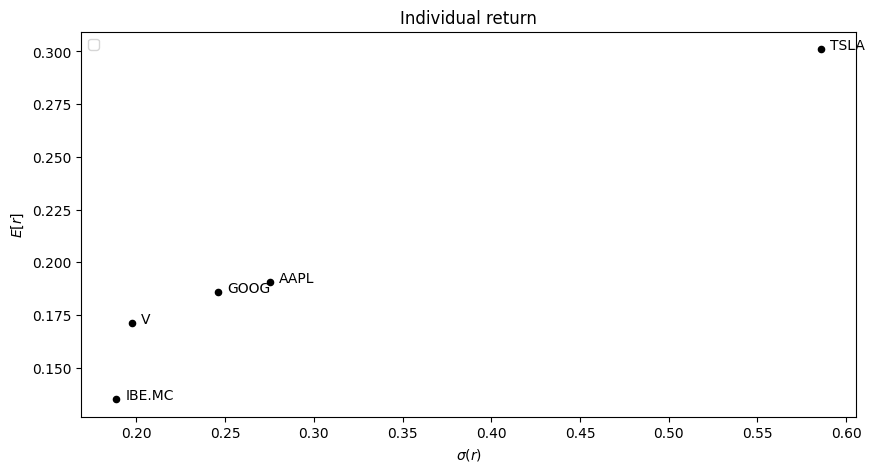

In [193]:
# Plot mean

plt.figure(1, figsize=(10,5))

# add single assets investment opportunities
plt.scatter(np.diag(Sigma)**0.5, mu[:], s=20, color='black')

for i in range(len(ticker)):
    plt.text((np.diag(Sigma)**0.5)[i] + 0.005, mu[i], ticker[i])

#descrive axis
plt.xlabel('$\sigma(r)$')
plt.ylabel('$E[r]$')

plt.legend()

#add a title
plt.title('Individual return')
plt.show()

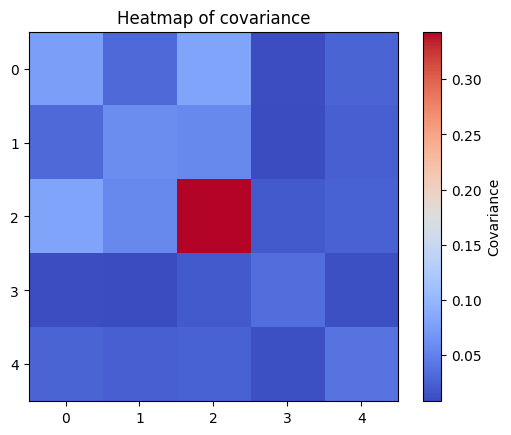

In [194]:
# Plot heatmap

plt.imshow(Sigma, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Heatmap of covariance')
plt.xticks(np.arange(Sigma.shape[0]))
plt.yticks(np.arange(Sigma.shape[1]))
plt.show()

# Building the MV-Frontier

## 1. Unconstrained

In [195]:
#SINGLE OPTIMIZATIONS: Objective Function, Constraint Function, Starting Values, Bounds

def portfolio_variance(w):
        #input: w as numpy column vector
        #output: scalar
    return (w.T@Sigma@w).item() #objective function to be minimized


def eq_portfolio_return(w):
    #input: numpy portfolio column vector
    #note: mu_i is a global variable; needs to be known before calling this function
    #output: difference between w's expected return and the target return; scalar
    
    return (w.T@mu).item() - mu_i #constraint to meet target expected return mu_i


def eq_weight_sum(w): 
    #content: full investment constraint: 100% is invested in risky assets
    #input: numpy portfolio column vector
    #output: difference between sum of portfolio holdings and 100%=1. 
    
    return np.sum(w) - 1


# starting values
w0 = [0.2, 0.2, 0.2, 0.2, 0.2]

#no short-sale (bound) and minimum diversification bound
bounds = [(0, 0.5), (0, 0.5), (0, 0.5), (0, 0.5), (0, 0.5)]


constraints = [{'type': 'eq', 'fun': eq_portfolio_return},
               {'type': 'eq', 'fun': eq_weight_sum}
               ] #target return and full investment constraint

In [196]:
#Loop through y-axis (i.e. mu_i)

mu_min = 0.01
mu_max = 1
incr = 0.001

In [197]:
#number of evaluations
nr_evals = int( (mu_max - mu_min) / incr + 1)
nr_evals #number of portfolios on the MV-frontier

991

In [198]:
# MV-Frontier

w_MV = np.zeros((nr_evals, 5))
mu_MV = np.zeros((nr_evals,))
sigma_MV = np.zeros((nr_evals,))

mu_i = mu_min
for i in range(0,nr_evals):
    w_opt = scipy.optimize.minimize(portfolio_variance, w0, constraints=constraints) # minimize variance for mu
    w_MV[i,:] = w_opt.x
    mu_MV[i] = (w_opt.x.T@mu).item() 
    sigma_MV[i] = (w_opt.x.T@Sigma@w_opt.x).item()**0.5
    
    mu_i = mu_i + incr

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l7/q149vsq90bb6jd1b96qw2qyc0000gn/T/ipykernel_27671/2251878233.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(r)$')


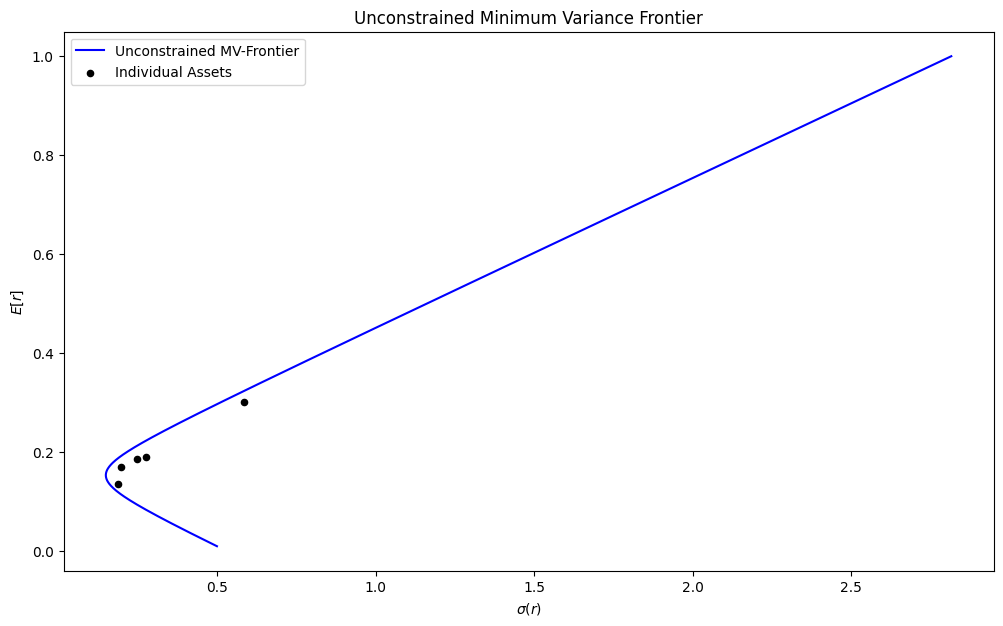

In [199]:
# Plot MV-Frontier

plt.figure(1, figsize=(12,7))

#show the MV-frontier that obeys constraints and bounds
plt.plot(sigma_MV, mu_MV, color='blue',label='Unconstrained MV-Frontier')

# add single assets investment opportunities
plt.scatter(np.diag(Sigma)**0.5, mu[:], s=20, color='black', label='Individual Assets')

#descrive axis
plt.xlabel('$\sigma(r)$')
plt.ylabel('$E[r]$')

plt.legend()

#add a title
plt.title('Unconstrained Minimum Variance Frontier')
plt.show()

## Constrained

In [200]:
#Loop through y-axis (i.e. mu_i)

mu_min = 0.01
mu_max = 1
incr = 0.001

In [201]:
#number of evaluations
nr_evals = int( (mu_max - mu_min) / incr + 1)
nr_evals #number of portfolios on the MV-frontier

991

In [202]:
# MV-Frontier

w_MV = np.zeros((nr_evals, 5))
mu_MV = np.zeros((nr_evals,))
sigma_MV = np.zeros((nr_evals,))

mu_i = mu_min
for i in range(0,nr_evals):
    w_opt = scipy.optimize.minimize(portfolio_variance, w0, bounds=bounds, constraints=constraints) # minimize variance for mu with bounds
    w_MV[i,:] = w_opt.x
    mu_MV[i] = (w_opt.x.T@mu).item()
    sigma_MV[i] = (w_opt.x.T@Sigma@w_opt.x).item()**0.5
    
    mu_i = mu_i + incr

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l7/q149vsq90bb6jd1b96qw2qyc0000gn/T/ipykernel_27671/1086647150.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(r)$')


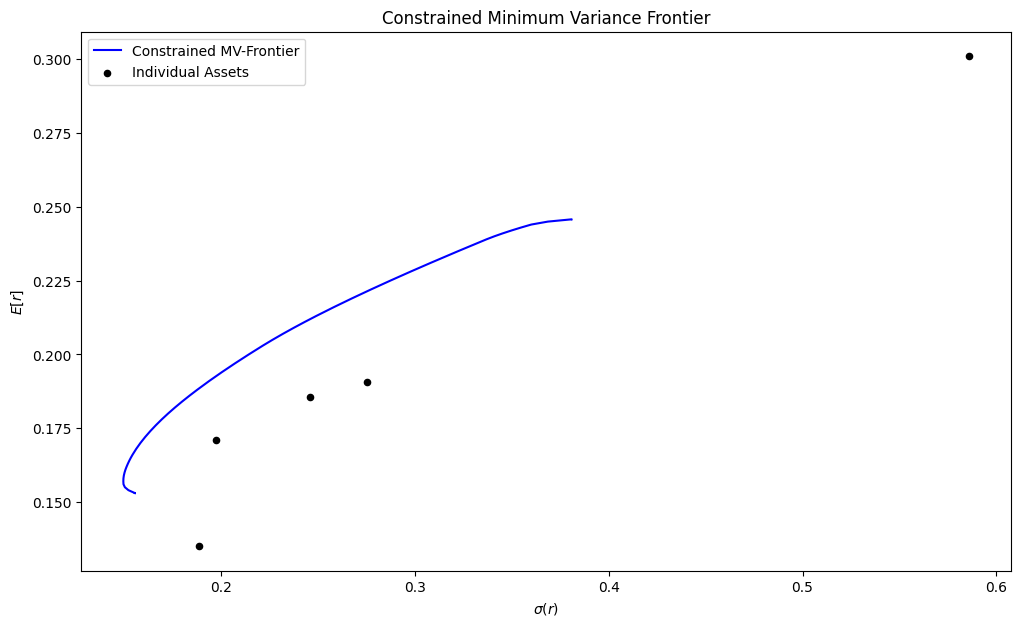

In [203]:
# Plot MV-Frontier

plt.figure(1, figsize=(12,7))

#show the MV-frontier that obeys constraints and bounds
plt.plot(sigma_MV, mu_MV, color='blue',label='Constrained MV-Frontier')

# add single assets investment opportunities
plt.scatter(np.diag(Sigma)**0.5, mu[:], s=20, color='black', label='Individual Assets')

#descrive axis
plt.xlabel('$\sigma(r)$')
plt.ylabel('$E[r]$')

plt.legend()

#add a title
plt.title('Constrained Minimum Variance Frontier')
plt.show()

# Tangency Portfolio

In [204]:
rf = 0.04146 # U.S. 1 Year Treasury

SR_MV = (mu_MV - rf) / sigma_MV

TP_index = np.argmax(SR_MV)

TP_index

161

In [205]:
w_TP = w_MV[TP_index]
w_TP

array([0.07381398, 0.21217878, 0.05067614, 0.30979883, 0.35353227])

In [206]:
mu_TP = mu_MV[TP_index]
mu_TP

0.17099999998970683

In [207]:
sigma_TP = sigma_MV[TP_index]
sigma_TP

0.15973419753763246

In [208]:
SR_TP = (mu_TP - rf) / sigma_TP
SR_TP

0.8109722400501492

# Optimal Complete Portfolio

In [209]:
A = 8 # risk aversion on (1-10) scale

y = (mu_TP - rf) / (A * (sigma_TP ** 2))

y

0.6346263453221161

In [210]:
# calculate utility

mu_C = y*mu_TP+(1-y)*rf 

sigma_C = y*sigma_TP

utility_C = mu_C - 0.5*A*(sigma_C**2)

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l7/q149vsq90bb6jd1b96qw2qyc0000gn/T/ipykernel_27671/667998582.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(r)$')


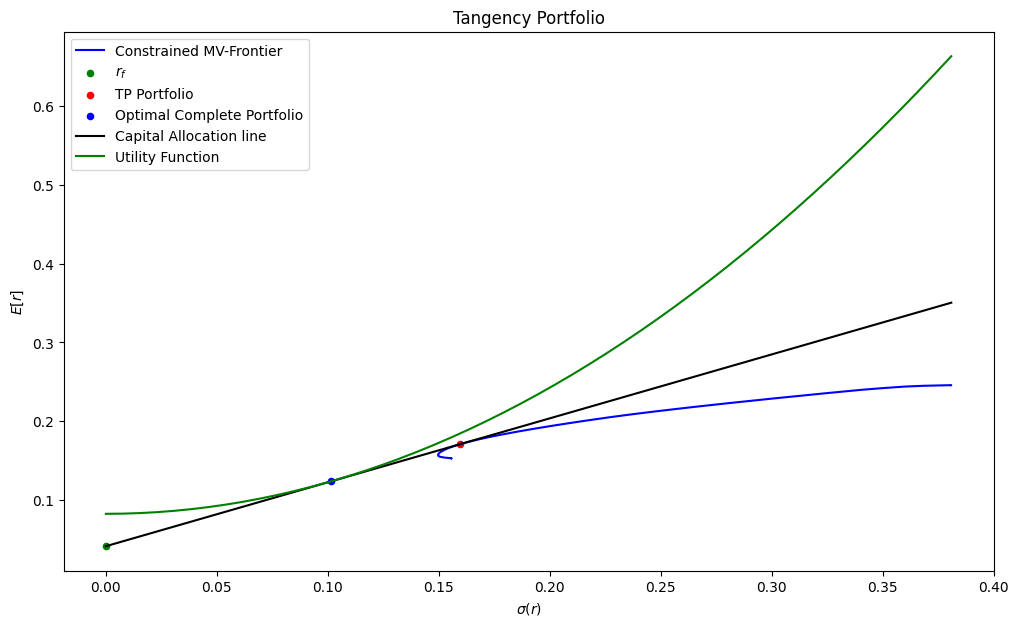

In [211]:
# Plot Tangency Portfolio

plt.figure(1, figsize=(12,7))

#show the MV-frontier that obeys constraints and bounds
plt.plot(sigma_MV, mu_MV, color='blue',label='Constrained MV-Frontier')

# add single assets investment opportunities and risk-free asset
plt.scatter([0], [rf], s = 20, color='green', label='$r_f$')
plt.scatter(sigma_TP, mu_TP, s = 20, color='red', label='TP Portfolio')
plt.scatter(sigma_C, mu_C, s = 20, color='blue', label='Optimal Complete Portfolio')

# add capital market line
x = np.linspace(0, np.max(sigma_MV))
y = rf + SR_TP * x
plt.plot(x, y, color='black', label='Capital Allocation line')

# add utility function
x = np.linspace(0, np.max(sigma_MV))
y = utility_C + 0.5*A*(x**2)
plt.plot(x, y, color='green', label='Utility Function')

#descrive axis
plt.xlabel('$\sigma(r)$')
plt.ylabel('$E[r]$')


plt.legend()

#add a title
plt.title('Tangency Portfolio')
plt.show()

# Decomposing expected portfolio performance (return and risk) into systematic ans idiosyncratic components

In [212]:
# calculate SP500 log-return
data['logreturn_^GSPC'] = np.log(data['^GSPC']) - np.log(data['^GSPC'].shift(1))

In [213]:
# drop nan
data = data.dropna()

In [214]:
# risk free return rate per month
rf_monthly = rf / 12

rf_monthly

0.0034549999999999997

In [215]:
# calculate OLS Model for each stock

betas = []
alphas = []

for i in range(len(ticker)):
    y = data["logreturn_" + ticker[i]] - rf_monthly # monthly stock excess reuturn
    X = data['logreturn_^GSPC'] - rf_monthly # monthly market excess return
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    betas.append(model.params.iloc[1])
    alphas.append(model.params.iloc[0]* 12) # annualized alpha


In [216]:
# Portfolio decomposition
portfolio_beta = np.sum(np.array(betas) * w_TP)
portfolio_alpha = np.sum(np.array(alphas) * w_TP)
systematic_var = portfolio_beta**2 * np.var(data['logreturn_^GSPC']) * 12

idiosyncratic_var = sigma_TP - systematic_var

print ( f" Portfolio Beta : { portfolio_beta :.4f}")
print ( f" Portfolio Alpha : { portfolio_alpha :.4f}")
print ( f" Systematic Variance : { systematic_var :.6f}")
print ( f" Idiosyncratic Variance : { idiosyncratic_var :.6f}")

 Portfolio Beta : 0.8437
 Portfolio Alpha : 0.0804
 Systematic Variance : 0.016908
 Idiosyncratic Variance : 0.142826


# Expected vs. Realized Performance

In [217]:
# build train and test data set
train_data = data.iloc[:int(len(data) * 0.7)][ticker_log] # use first 70%
test_data = data.iloc[-int(len(data) * 0.3):][ticker_log] # use last 30%

In [218]:
# calculate expected performance
mean_train_data = train_data.mean() * 12
sigma_train_data = train_data.cov() * 12

exp_return = np.sum(mean_train_data * w_TP)
exp_vol = np.sqrt(w_TP @ sigma_train_data @ w_TP)

In [219]:
# calculate realized performance

realized_returns = np.sum(test_data * w_TP, axis=1)
realized_return = realized_returns.mean() * 12
realized_vol = realized_returns.std() * np.sqrt(12)

In [220]:
print(f" Expected Return : { exp_return :.4f} , Realized Return :{ realized_return :.4f}")

print(f" Expected Volatility : { exp_vol :.4f} , Realized Volatility :{ realized_vol :.4f}")

 Expected Return : 0.1832 , Realized Return :0.1875
 Expected Volatility : 0.1629 , Realized Volatility :0.1468
